In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
aba = pd.read_csv("C:/Users/Rakes/OneDrive/Desktop/stats/p1/abalone_dataset.csv")

In [3]:
aba.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
aba.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [5]:
aba.shape

(4177, 9)

In [6]:
aba.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [7]:
aba.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

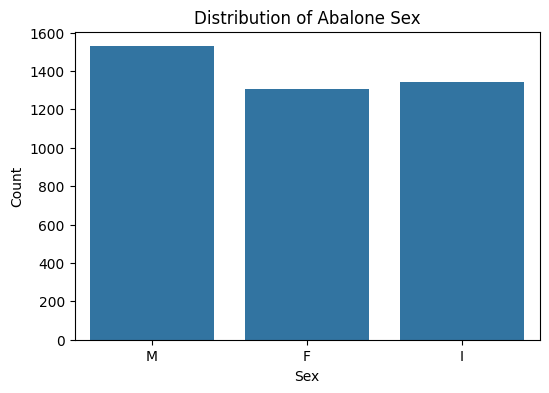

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=aba["Sex"])
plt.title("Distribution of Abalone Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

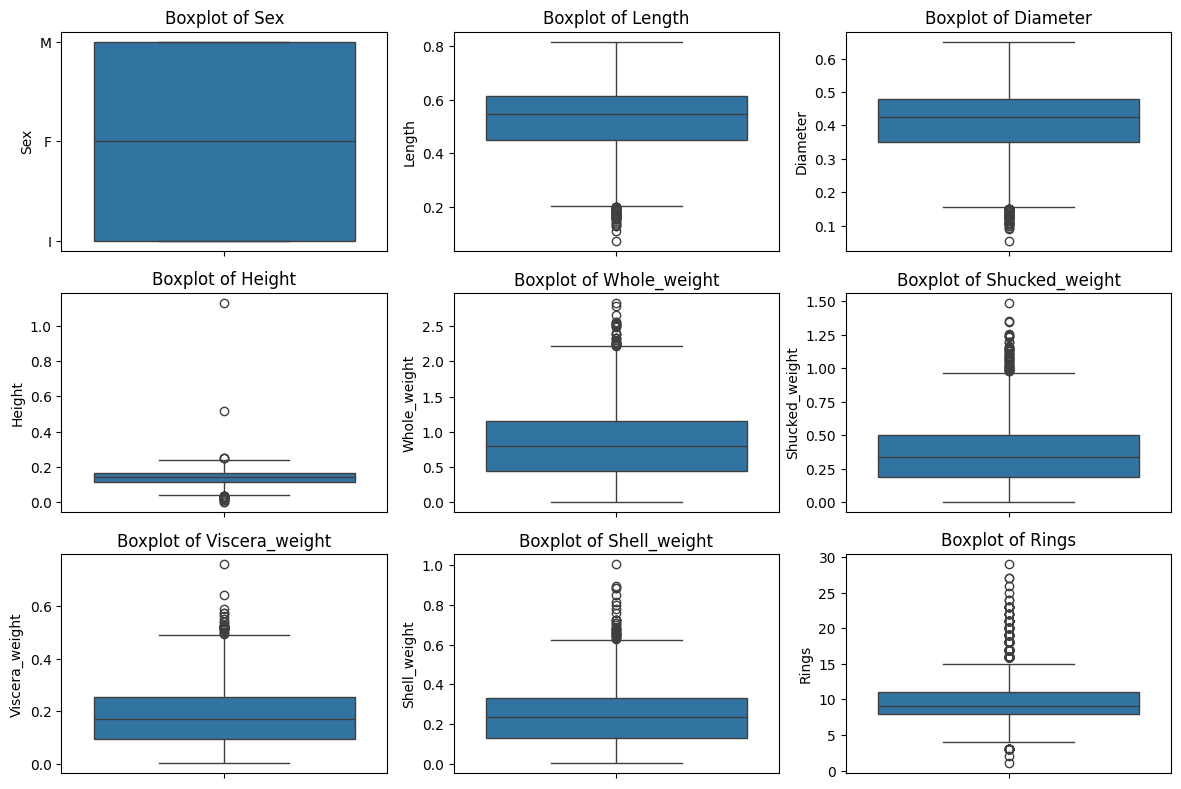

In [9]:
# Box plots 
cols = ["Sex","Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=aba[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


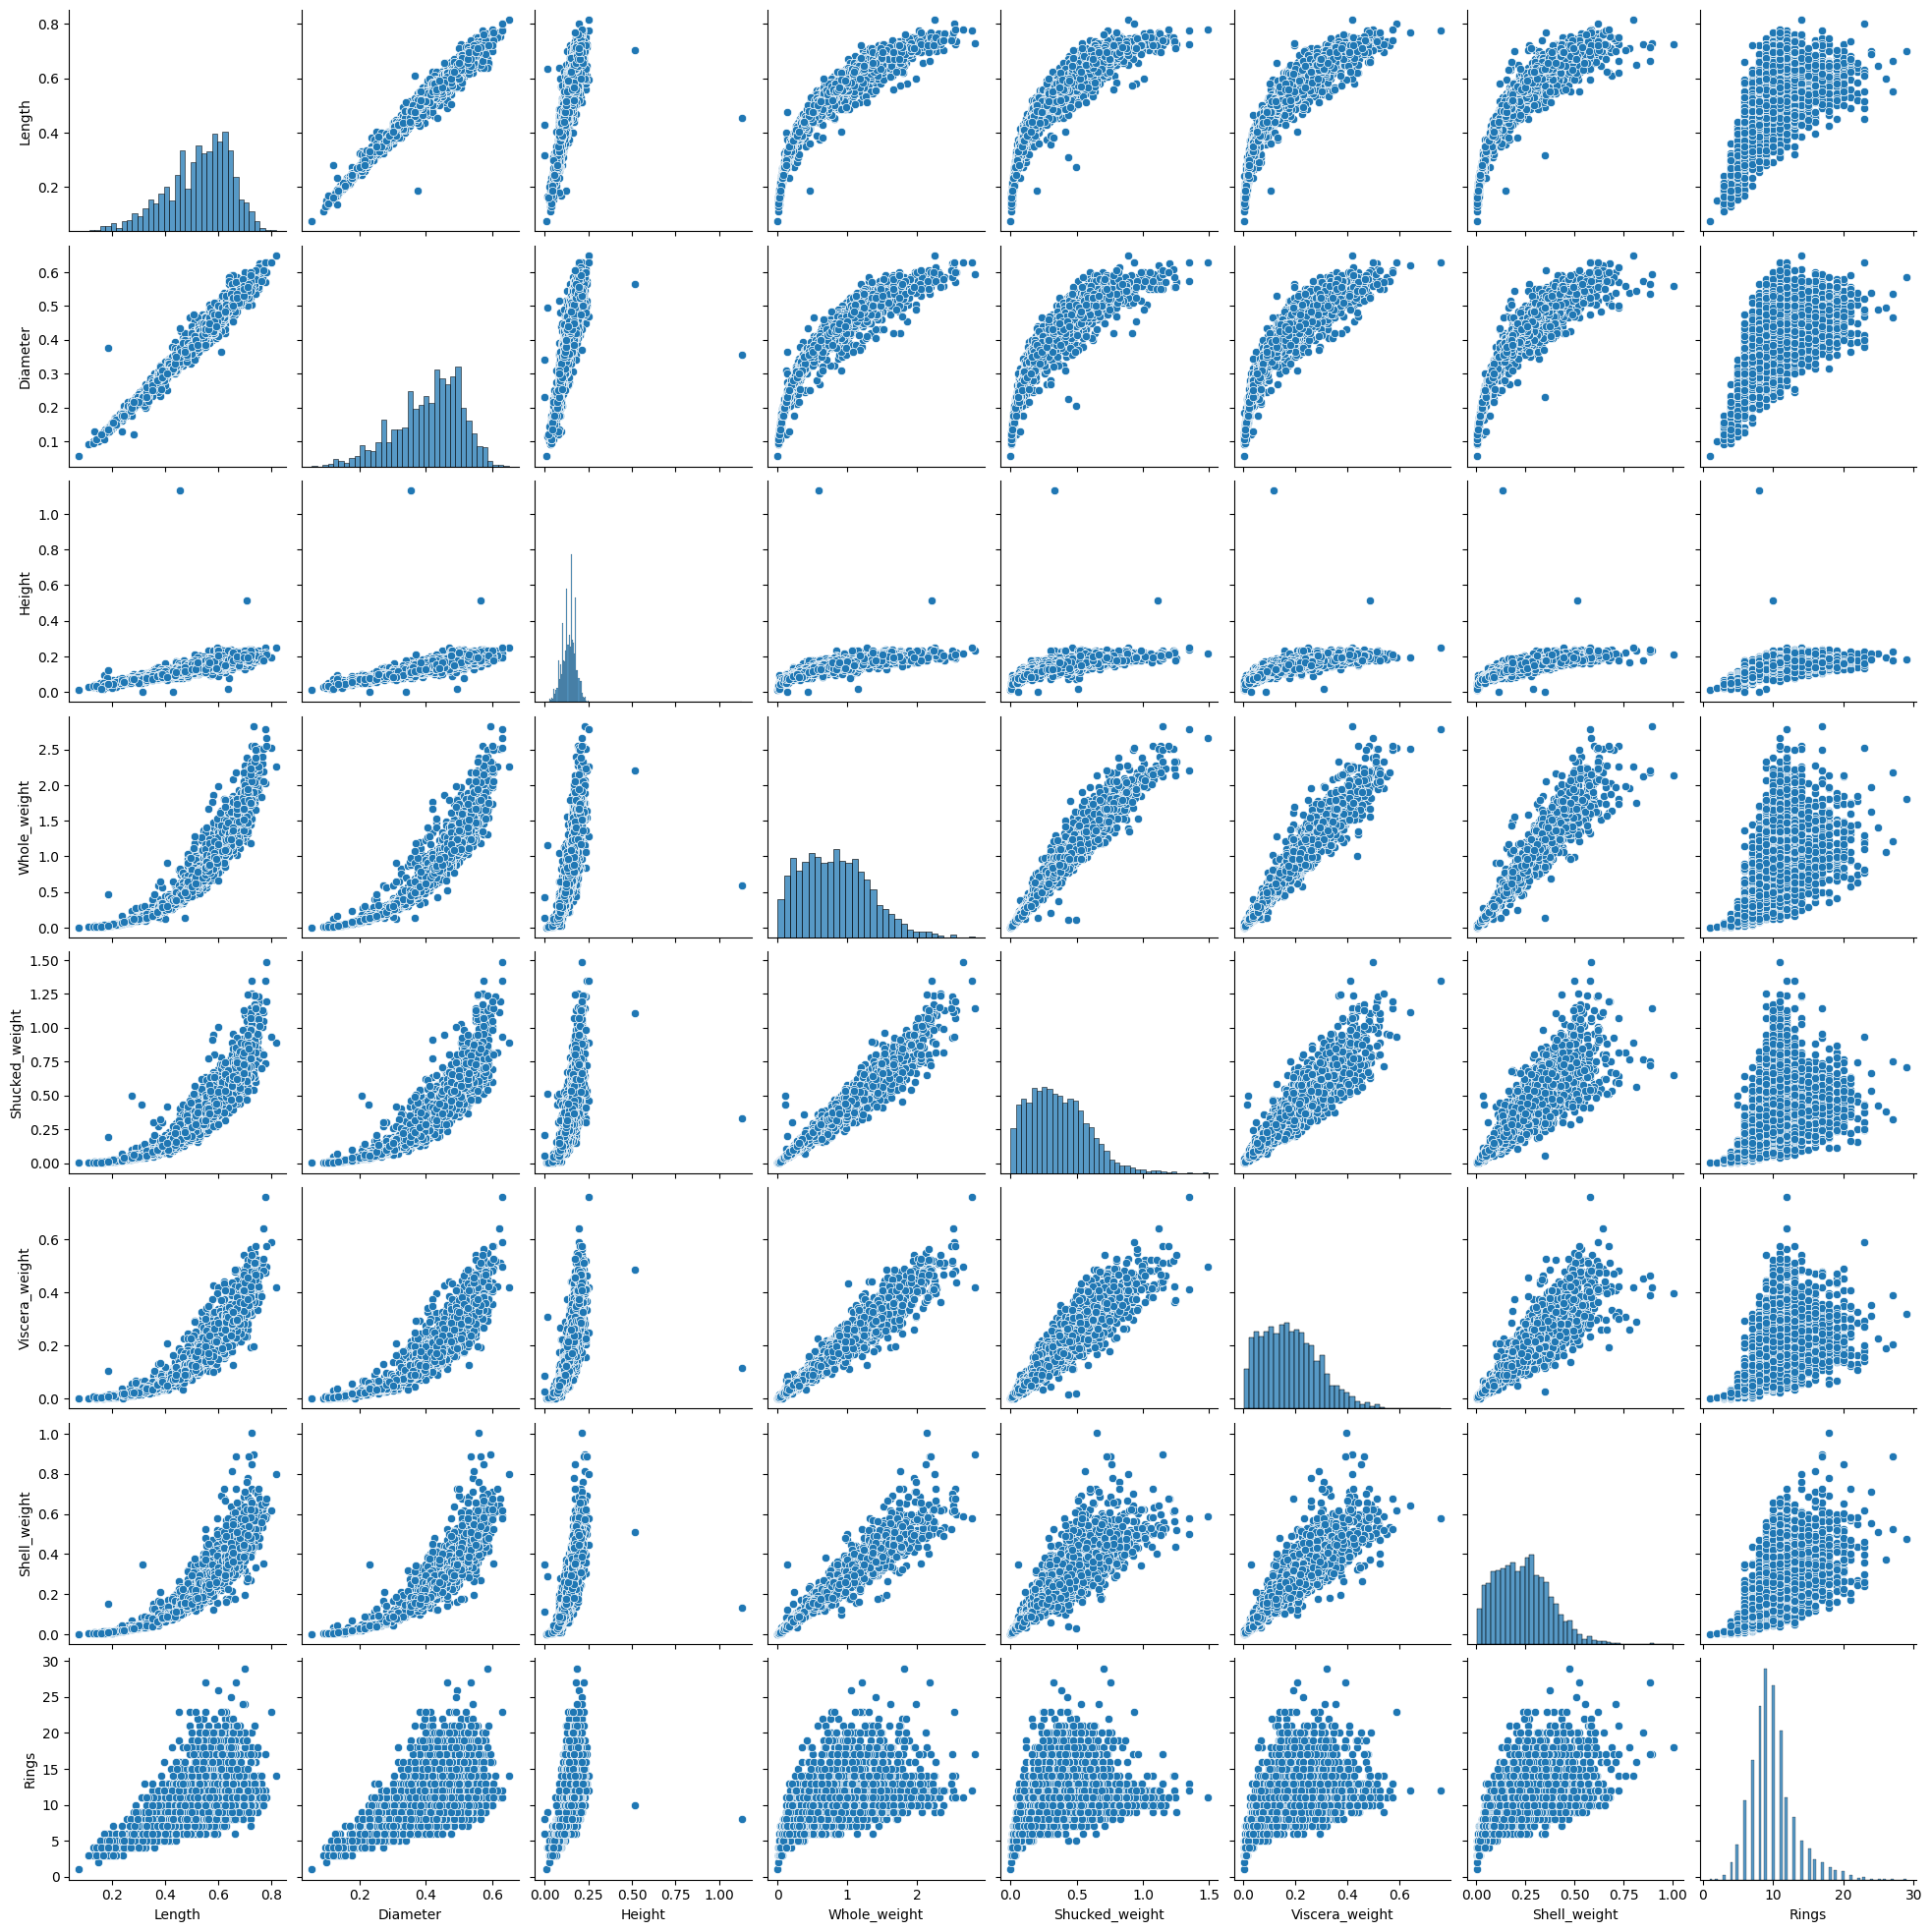

In [10]:
# Relationships between features
sns.pairplot(aba)
plt.show()

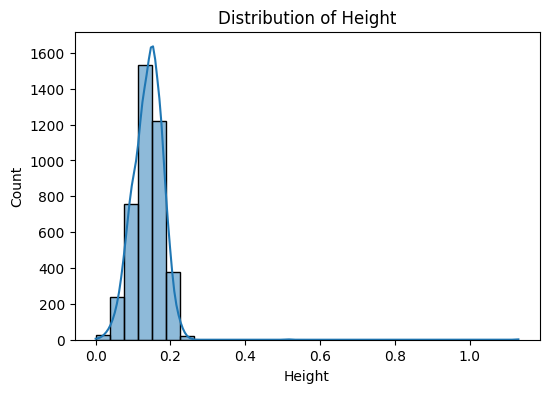

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(aba["Height"], bins=30, kde=True)
plt.title("Distribution of Height")
plt.show()


Text(0, 0.5, 'Rings')

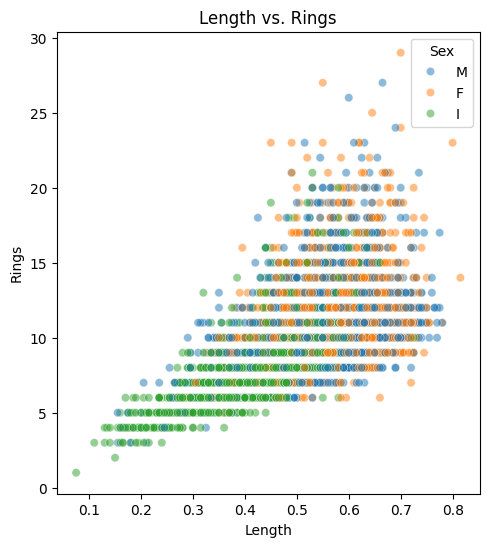

In [12]:
# Scatter plots to visualize growth
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=aba["Length"], y=aba["Rings"], hue=aba["Sex"].astype(str), alpha=0.5)
plt.title("Length vs. Rings")
plt.xlabel("Length")
plt.ylabel("Rings")

In [13]:
# Impute zero height values with mean height
aba.loc[aba["Height"] == 0, "Height"] = aba["Height"].mean()

In [14]:
from scipy.stats.mstats import winsorize
# Winsorization: Cap extreme values at 5th and 95th percentile
for col in ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]:
    aba[col] = winsorize(aba[col], limits=[0.05, 0.05])

In [15]:
aba = pd.get_dummies(aba, columns=["Sex"])

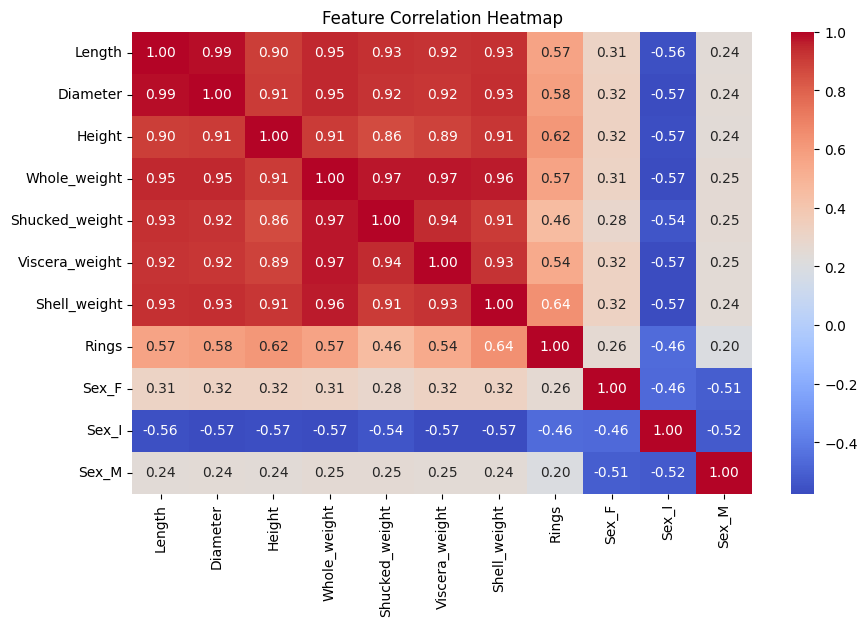

In [16]:
# Compute correlation matrix
corr_matrix = aba.corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Splitting data
X = aba.drop(columns=["Rings"])
y = aba["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)

import statsmodels.api as sm
# Add constant for OLS
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)
# Fit OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     460.5
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:00:14   Log-Likelihood:                -6730.3
No. Observations:                3341   AIC:                         1.348e+04
Df Residuals:                    3331   BIC:                         1.354e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.8743      0.031    314.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Prediction
y_pred = ols_model.predict(X_test_ols)
# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 3.3736
Mean Absolute Error (MAE): 1.4127
R-squared (R²): 0.5496


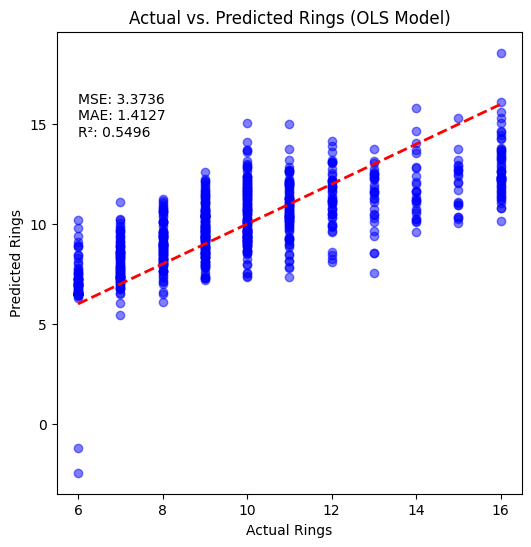

In [19]:
# Scatter plot for OLS Model
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (OLS Model)")
plt.text(min(y_test), max(y_pred) - 2, f"MSE: {mse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}", fontsize=10, verticalalignment='top')
plt.show()


In [20]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f"\nRidge Regression Evaluation Metrics:")
print(f"MSE: {ridge_mse:.4f}")
print(f"MAE: {ridge_mae:.4f}")
print(f"R²: {ridge_r2:.4f}")


Ridge Regression Evaluation Metrics:
MSE: 3.3697
MAE: 1.4200
R²: 0.5502


In [21]:
# Coefficients Summary for Ridge Regression
ridge_coefficients = pd.Series(ridge.coef_, index=X.columns)
print("\nRidge Regression Coefficients:")
print(ridge_coefficients)


Ridge Regression Coefficients:
Length             2.134166
Diameter           5.892062
Height             9.001296
Whole_weight       6.008200
Shucked_weight   -16.912315
Viscera_weight    -4.183926
Shell_weight      10.411092
Sex_F              0.245876
Sex_I             -0.530194
Sex_M              0.284318
dtype: float64


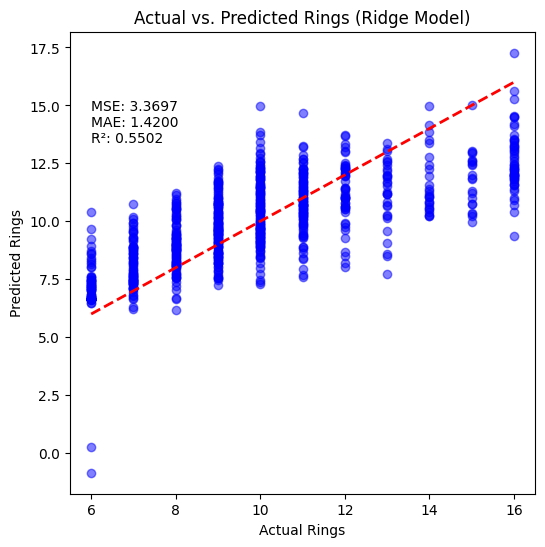

In [22]:
# Scatter plot for Ridge Model
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (Ridge Model)")
plt.text(min(y_test), max(y_ridge_pred) - 2, f"MSE: {ridge_mse:.4f}\nMAE: {ridge_mae:.4f}\nR²: {ridge_r2:.4f}", fontsize=10, verticalalignment='top')
plt.show()


In [23]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_mae = mean_absolute_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f"\nLasso Regression Evaluation Metrics:")
print(f"MSE: {lasso_mse:.4f}")
print(f"MAE: {lasso_mae:.4f}")
print(f"R²: {lasso_r2:.4f}")

# Coefficients Summary for Lasso Regression
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Regression Coefficients:")
print(lasso_coefficients)



Lasso Regression Evaluation Metrics:
MSE: 4.8442
MAE: 1.7291
R²: 0.3533

Lasso Regression Coefficients:
Length            0.000000
Diameter          0.000000
Height            0.000000
Whole_weight      2.429523
Shucked_weight   -0.000000
Viscera_weight    0.000000
Shell_weight      0.000000
Sex_F             0.000000
Sex_I            -0.785001
Sex_M             0.000000
dtype: float64


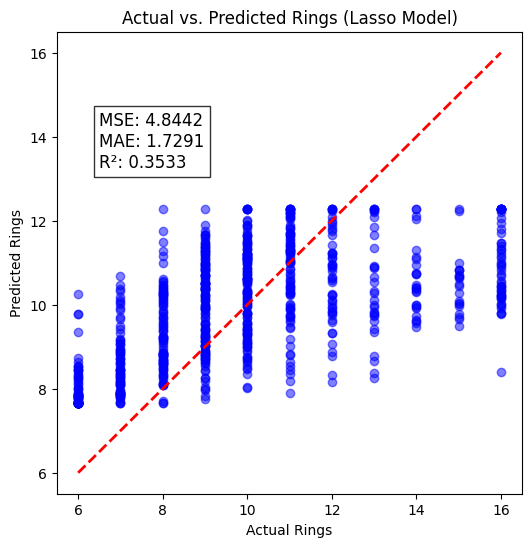

In [24]:
# Scatter plot for Lasso Model
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_lasso_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (Lasso Model)")

plt.text(min(y_test) + 0.5, max(y_lasso_pred) + 1,
         f"MSE: {lasso_mse:.4f}\nMAE: {lasso_mae:.4f}\nR²: {lasso_r2:.4f}", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from patsy import dmatrix

# Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = sm.OLS(y_train, sm.add_constant(X_train_poly)).fit()
print("\nPolynomial Regression Summary:")
print(poly_model.summary())

# Predictions
y_poly_pred = poly_model.predict(sm.add_constant(X_test_poly))
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)
print(f"\nPolynomial Regression Evaluation Metrics:")
print(f"MSE: {poly_mse:.4f}")
print(f"MAE: {poly_mae:.4f}")
print(f"R²: {poly_r2:.4f}")


Polynomial Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     94.80
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:00:15   Log-Likelihood:                -6570.2
No. Observations:                3341   AIC:                         1.324e+04
Df Residuals:                    3289   BIC:                         1.356e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.201

In [26]:
# Compute training predictions
y_poly_train_pred = poly_model.predict(sm.add_constant(X_train_poly))

# Training vs Test R2
train_r2_poly = r2_score(y_train, y_poly_train_pred)
test_r2_poly = r2_score(y_test, y_poly_pred)

# Training vs Test MSE
train_mse_poly = mean_squared_error(y_train, y_poly_train_pred)
test_mse_poly = mean_squared_error(y_test, y_poly_pred)

print(f"\nPolynomial Regression Overfitting Check:")
print(f"Training R2: {train_r2_poly:.4f}")
print(f"Test R2: {test_r2_poly:.4f}")
print(f"Training MSE: {train_mse_poly:.4f}")
print(f"Test MSE: {test_mse_poly:.4f}")



Polynomial Regression Overfitting Check:
Training R2: 0.5952
Test R2: 0.5734
Training MSE: 2.9898
Test MSE: 3.1953


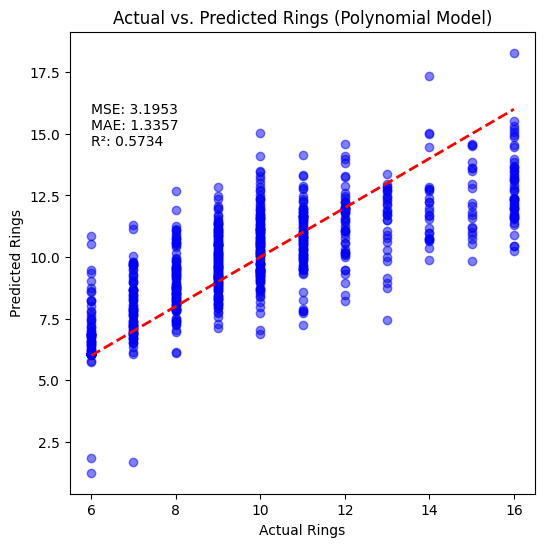

In [27]:
# Scatter plot for Polynomial Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_poly_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs. Predicted Rings (Polynomial Model)")

plt.text(min(y_test), max(y_poly_pred) - 2, 
         f"MSE: {poly_mse:.4f}\nMAE: {poly_mae:.4f}\nR²: {poly_r2:.4f}", 
         fontsize=10, verticalalignment='top')

plt.show()


In [28]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

degrees = [1, 2, 3, 4, 5]

poly_results = {}

for degree in degrees:
    print(f"\n Polynomial Degree: {degree}")

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    poly_model = sm.OLS(y_train, sm.add_constant(X_train_poly)).fit()

    y_poly_pred = poly_model.predict(sm.add_constant(X_test_poly))

    poly_mse = mean_squared_error(y_test, y_poly_pred)
    poly_mae = mean_absolute_error(y_test, y_poly_pred)
    poly_r2 = r2_score(y_test, y_poly_pred)

    poly_results[degree] = {
        "MSE": poly_mse,
        "MAE": poly_mae,
        "R2": poly_r2
    }

    print(f" Degree {degree} - MSE: {poly_mse:.4f}, MAE: {poly_mae:.4f}, R²: {poly_r2:.4f}")


 Polynomial Degree: 1
 Degree 1 - MSE: 3.3736, MAE: 1.4127, R²: 0.5496

 Polynomial Degree: 2
 Degree 2 - MSE: 3.1953, MAE: 1.3357, R²: 0.5734

 Polynomial Degree: 3
 Degree 3 - MSE: 6.8021, MAE: 1.4638, R²: 0.0919

 Polynomial Degree: 4
 Degree 4 - MSE: 175.1503, MAE: 2.5135, R²: -22.3822

 Polynomial Degree: 5
 Degree 5 - MSE: 3170.7095, MAE: 8.2069, R²: -422.2837


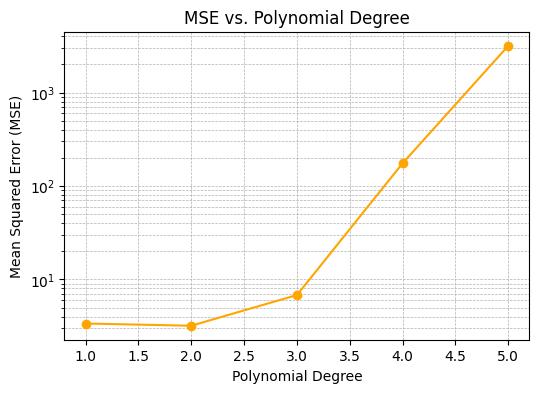

In [29]:
# Plot MSE vs. Polynomial Degree
degrees = list(poly_results.keys())
mse_values = [metrics["MSE"] for metrics in poly_results.values()]
plt.figure(figsize=(6, 4))
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='orange')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Polynomial Degree")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
